# 케라스 다양한 학습 기술

- 과대적합, 과소적합을 막기 위한 방법들
  - 모델의 크기 축소
  
  - 초기화

  - 옵티마이저

  - 배치 정규화

  - 규제화

### 모델의 크기 축소
- 가장 단순한 방법

- 모델의 크기를 줄인다는 것은 **학습 파라미터의 수를 줄이는 것**

#### 데이터 준비
- 설명을 위한 코드

In [29]:
import tensorflow as tf
import tensorflow.keras as keras
from keras.datasets import imdb

import numpy as np

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=10_000)

def vectorize_seq(seqs, dim=10_000):
    results = np.zeros((len(seqs), dim))
    
    for i, seq in enumerate(seqs):
        results[i, seq] = 1.
    
    return results

x_train_preprocessed = vectorize_seq(x_train)
x_test_preprocessed = vectorize_seq(x_test)
y_train_preprocessed = np.asarray(y_train, dtype="float32")
y_test_preprocessed = np.asarray(y_test, dtype="float32")

#### 2가지의 모델 설정

In [30]:
from keras.models import Sequential
from keras.layers import Input, Dense

In [31]:
model_1 = Sequential([
    Input(shape=(10_000, ), name="Input"),
    Dense(16, activation="relu", name="Dense_1"),
    Dense(16, activation="relu", name="Dense_2"),
    Dense(1, activation="sigmoid", name="Output")
])

In [32]:
model_1.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Dense_1 (Dense)             (None, 16)                160016    
                                                                 
 Dense_2 (Dense)             (None, 16)                272       
                                                                 
 Output (Dense)              (None, 1)                 17        
                                                                 
Total params: 160305 (626.19 KB)
Trainable params: 160305 (626.19 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [33]:
model_2 = Sequential([
    Input(shape=(10_000, ), name="Input"),
    Dense(7, activation="relu", name="Dense_1"),
    Dense(7, activation="relu", name="Dense_2"),
    Dense(1, activation="sigmoid", name="Output")
])

In [34]:
model_2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Dense_1 (Dense)             (None, 7)                 70007     
                                                                 
 Dense_2 (Dense)             (None, 7)                 56        
                                                                 
 Output (Dense)              (None, 1)                 8         
                                                                 
Total params: 70071 (273.71 KB)
Trainable params: 70071 (273.71 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [35]:
model_1.compile(
    loss="binary_crossentropy",
    optimizer="rmsprop",
    metrics=["acc"]
)

model_2.compile(
    loss="binary_crossentropy",
    optimizer="rmsprop",
    metrics=["acc"]
)

#### 2개의 모델 학습

In [36]:
hist_1 = model_1.fit(
    x_train_preprocessed, y_train_preprocessed,
    epochs=20,
    batch_size=512,
    validation_data=(x_test_preprocessed, y_test_preprocessed)
)

Epoch 1/20
49/49 [==============================] - 2s 37ms/step - loss: 0.4549 - acc: 0.8233 - val_loss: 0.3387 - val_acc: 0.8773
Epoch 2/20
49/49 [==============================] - 1s 12ms/step - loss: 0.2710 - acc: 0.9016 - val_loss: 0.2844 - val_acc: 0.8898
Epoch 3/20
49/49 [==============================] - 1s 12ms/step - loss: 0.2105 - acc: 0.9247 - val_loss: 0.2787 - val_acc: 0.8885
Epoch 4/20
49/49 [==============================] - 1s 11ms/step - loss: 0.1814 - acc: 0.9343 - val_loss: 0.2863 - val_acc: 0.8872
Epoch 5/20
49/49 [==============================] - 1s 13ms/step - loss: 0.1577 - acc: 0.9432 - val_loss: 0.2994 - val_acc: 0.8823
Epoch 6/20
49/49 [==============================] - 1s 11ms/step - loss: 0.1439 - acc: 0.9483 - val_loss: 0.4157 - val_acc: 0.8481
Epoch 7/20
49/49 [==============================] - 1s 12ms/step - loss: 0.1304 - acc: 0.9548 - val_loss: 0.3439 - val_acc: 0.8741
Epoch 8/20
49/49 [==============================] - 1s 12ms/step - loss: 0.1171 - a

In [37]:
hist_2 = model_2.fit(
    x_train_preprocessed, y_train_preprocessed,
    epochs=20,
    batch_size=512,
    validation_data=(x_test_preprocessed, y_test_preprocessed)
)

Epoch 1/20
49/49 [==============================] - 2s 30ms/step - loss: 0.5183 - acc: 0.8041 - val_loss: 0.4101 - val_acc: 0.8647
Epoch 2/20
49/49 [==============================] - 1s 13ms/step - loss: 0.3237 - acc: 0.8942 - val_loss: 0.3178 - val_acc: 0.8829
Epoch 3/20
49/49 [==============================] - 1s 13ms/step - loss: 0.2479 - acc: 0.9158 - val_loss: 0.2931 - val_acc: 0.8851
Epoch 4/20
49/49 [==============================] - 1s 12ms/step - loss: 0.2072 - acc: 0.9282 - val_loss: 0.2850 - val_acc: 0.8862
Epoch 5/20
49/49 [==============================] - 1s 13ms/step - loss: 0.1813 - acc: 0.9381 - val_loss: 0.2811 - val_acc: 0.8883
Epoch 6/20
49/49 [==============================] - 1s 13ms/step - loss: 0.1620 - acc: 0.9440 - val_loss: 0.2906 - val_acc: 0.8838
Epoch 7/20
49/49 [==============================] - 1s 12ms/step - loss: 0.1466 - acc: 0.9506 - val_loss: 0.3032 - val_acc: 0.8818
Epoch 8/20
49/49 [==============================] - 1s 12ms/step - loss: 0.1332 - a

#### 비교

In [39]:
epochs = range(1, 21)
val_loss_1 = hist_1.history["val_loss"]
val_loss_2 = hist_2.history["val_loss"]

In [43]:
import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8-white")

model_2 (더 작은 모델)이 '조금 더 나중에' 과대적합 발생

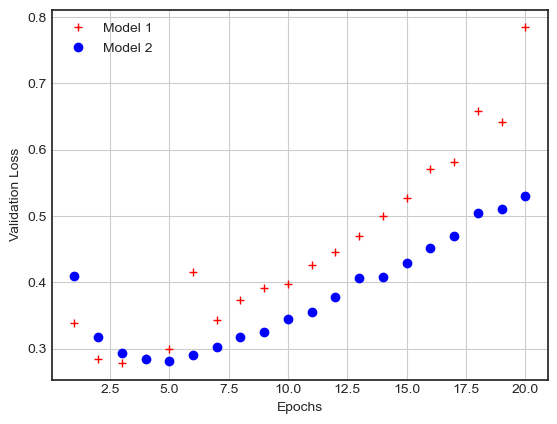

In [44]:
plt.plot(epochs, val_loss_1, "r+", label="Model 1")
plt.plot(epochs, val_loss_2, "bo", label="Model 2")
plt.xlabel("Epochs")
plt.ylabel("Validation Loss")
plt.legend()
plt.grid()

plt.show()

### 모델의 크기 축소 (2)


#### 모델 구성

In [46]:
model_3 = Sequential([
    Input(shape=(10_000, ), name="Input"),
    Dense(1024, activation="relu", name="Dense_1"),
    Dense(1024, activation="relu", name="Dense_2"),
    Dense(1, activation="sigmoid", name="Output")
])

model_3.compile(
    loss="binary_crossentropy",
    optimizer="rmsprop",
    metrics=["acc"]
)

model_3.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Dense_1 (Dense)             (None, 1024)              10241024  
                                                                 
 Dense_2 (Dense)             (None, 1024)              1049600   
                                                                 
 Output (Dense)              (None, 1)                 1025      
                                                                 
Total params: 11291649 (43.07 MB)
Trainable params: 11291649 (43.07 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#### 모델 학습
- 시간 소요

In [47]:
hist_3 = model_3.fit(
    x_train_preprocessed, y_train_preprocessed,
    epochs=20,
    batch_size=512,
    validation_data=(x_test_preprocessed, y_test_preprocessed)
)

Epoch 1/20
49/49 [==============================] - 7s 141ms/step - loss: 0.5207 - acc: 0.7503 - val_loss: 0.3368 - val_acc: 0.8544
Epoch 2/20
49/49 [==============================] - 6s 121ms/step - loss: 0.2831 - acc: 0.8842 - val_loss: 0.2876 - val_acc: 0.8802
Epoch 3/20
49/49 [==============================] - 6s 121ms/step - loss: 0.2146 - acc: 0.9148 - val_loss: 0.2718 - val_acc: 0.8882
Epoch 4/20
49/49 [==============================] - 6s 122ms/step - loss: 0.1630 - acc: 0.9369 - val_loss: 0.2839 - val_acc: 0.8867
Epoch 5/20
49/49 [==============================] - 6s 122ms/step - loss: 0.1137 - acc: 0.9580 - val_loss: 0.5011 - val_acc: 0.8351
Epoch 6/20
49/49 [==============================] - 6s 123ms/step - loss: 0.0857 - acc: 0.9689 - val_loss: 0.3402 - val_acc: 0.8817
Epoch 7/20
49/49 [==============================] - 6s 121ms/step - loss: 0.0579 - acc: 0.9841 - val_loss: 0.3897 - val_acc: 0.8818
Epoch 8/20
49/49 [==============================] - 6s 122ms/step - loss: 0.

#### 시각화

In [50]:
val_loss_3 = hist_3.history["val_loss"]

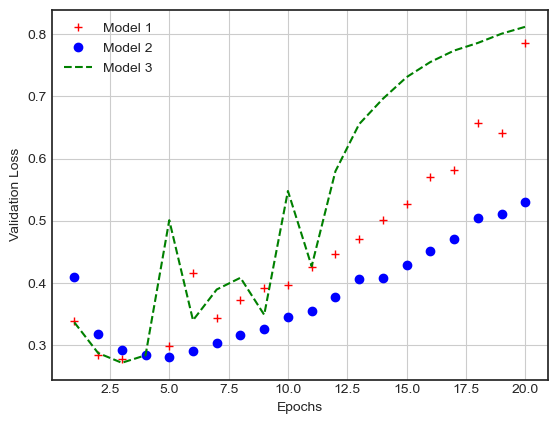

In [51]:
plt.plot(epochs, val_loss_1, "r+", label="Model 1")
plt.plot(epochs, val_loss_2, "bo", label="Model 2")
plt.plot(epochs, val_loss_3, "g--", label="Model 3")
plt.xlabel("Epochs")
plt.ylabel("Validation Loss")
plt.legend()
plt.grid()

plt.show()

* 볼륨이 큰 신경망일수록 빠르게 훈련데이터 모델링 가능(학습 손실이 낮아짐)
* 과대 적합에는 더욱 민감해짐
* 이는 학습-검증 데이터의 손실을 보면 알 수 있음

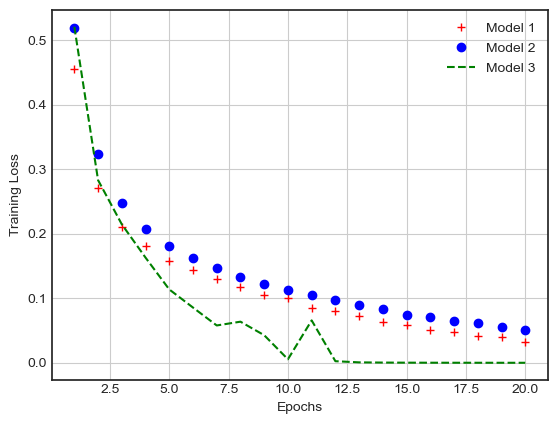

In [52]:
loss_1 = hist_1.history["loss"]
loss_2 = hist_2.history["loss"]
loss_3 = hist_3.history["loss"]

plt.plot(epochs, loss_1, "r+", label="Model 1")
plt.plot(epochs, loss_2, "bo", label="Model 2")
plt.plot(epochs, loss_3, "g--", label="Model 3")
plt.xlabel("Epochs")
plt.ylabel("Training Loss")
plt.legend()
plt.grid()

plt.show()

### 가중치 초기화


#### 초기화 전략

- Glorot Initialization (Xavier)
  - 활성화 함수  
    - 없음
    - tanh
    - sigmoid
    - softmax

- He Initialization
  - 활성화 함수  
    - ReLU
    - LeakyReLU
    - ELU 등

    

In [53]:
from keras.layers import Dense, LeakyReLU, Activation
from keras.models import Sequential

In [55]:
model = Sequential([
    Dense(30, kernel_initializer="he_normal", input_shape=[10, 10]),
    LeakyReLU(alpha=0.2),
    Dense(1, kernel_initializer="he_normal"),
    Activation("softmax")
])

model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 10, 30)            330       
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 10, 30)            0         
                                                                 
 dense_3 (Dense)             (None, 10, 1)             31        
                                                                 
 activation_1 (Activation)   (None, 10, 1)             0         
                                                                 
Total params: 361 (1.41 KB)
Trainable params: 361 (1.41 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### 고속 옵티마이저

#### 모멘텀 최적화

$
\qquad v \ \leftarrow \ \alpha \ v - \gamma \ \frac{\partial L}{\partial W} \\
\qquad W \ \leftarrow \ W \ + \ v
$

  - $\alpha\ $ : 관성계수

  - $v$ :  속도

  - $\gamma\ $ : 학습률

  - $\frac{\partial L}{\partial W}\ $ : 손실함수에 대한 미분

In [56]:
from keras.optimizers import SGD

In [57]:
optimizer = SGD(learning_rate=0.001, momentum=0.9)

#### 네스테로프 (Nesterov)

- 모멘텀의 방향으로 조금 앞선 곳에서 손실함수의 그라디언트를 구함

- 시간이 지날수록 조금 더 빨리 최솟값에 도달

$
\qquad m \ \leftarrow \  \beta m - \eta \bigtriangledown_\theta J(\theta + \beta m) \\
\qquad \theta \ \leftarrow \ \theta \ + m
$


  - $h\ $ : 기존 기울기를 제곱하여 더한 값

  - $\eta\ $ : 학습률

  - $\bigtriangledown_\theta J(\theta) \ $ : $\theta$에 대한 미분(그라디언트)

  <img src="https://t1.daumcdn.net/cfile/tistory/99D91C455C76428D11">

  <sub>출처: CS231n</sub>

In [58]:
optimizer = SGD(learning_rate=0.001, momentum=0.9, nesterov=True)

#### AdaGrad

- 보통 간단한 모델에는 효과 좋을 수는 있으나, 심층 신경망 모델에서는 사용 X

$
\qquad h \ \leftarrow \  h + \frac{\partial L}{\partial W} \odot \frac{\partial L}{\partial W} \\
\qquad W \ \leftarrow \ W \ + \gamma \frac{1}{\sqrt h} \ \frac{\partial L}{\partial W}
$

  - $h\ $ : 기존 기울기를 제곱하여 더한 값

  - $\gamma\ $ : 학습률

  - $\frac{\partial L}{\partial W}\ $ : $W$에 대한 미분


In [59]:
from keras.optimizers import Adagrad

In [60]:
optimizer = Adagrad(learning_rate=0.001)

#### RMSProp


$
\qquad s \ \leftarrow \ \beta \ s + (1 - \beta) \bigtriangledown_{\theta} J(\theta) \otimes \bigtriangledown_{\theta} J(\theta) \\
\qquad \theta \ \leftarrow \ \theta \ - \eta  \ \bigtriangledown_{\theta} J(\theta) \oslash \sqrt{s + \epsilon}
$

  - $s \ $ : 그래디언트의 제곱을 감쇠율을 곱한 후 더함

  - $\eta\ $ : 학습률

  - $\bigtriangledown_{\theta} J(\theta) \ $ : 손실함수의 미분값


  

In [61]:
from keras.optimizers import RMSprop

In [62]:
optimizer = RMSprop(learning_rate=0.001, rho=0.9)

#### Adam

$
\qquad m \ \leftarrow \  \beta_1 \ m - (1 - \beta_1)\ \frac{\partial L}{\partial W}  \\
\qquad s \ \leftarrow \ \beta_2 \ s + (1 - \beta_2) \frac{\partial L}{\partial W} \odot \frac{\partial L}{\partial W} \\
\qquad \hat{m} \ \leftarrow \frac{m}{1 - \beta_1^t} \\
\qquad \hat{s} \ \leftarrow \frac{s}{1 - \beta_2^t} \\
\qquad W \ \leftarrow \ W \ + \gamma \ \hat{m}\  \oslash \sqrt{\hat{s} + \epsilon}
$

  - $\beta\ $ : 지수 평균의 업데이트 계수

  - $\gamma\ $ : 학습률

  - $\beta_1 \approx 0.9\ ,\ \ \beta_2 \approx 0.999$

  - $\frac{\partial L}{\partial W}\ $ : $W$에 대한 미분

In [63]:
from keras.optimizers import Adam

In [64]:
optimizer = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)

### 배치 정규화
- 모델에 주입되는 샘플들을 균일하게 만드는 방법

- 학습 후 새로운 데이터에 잘 일반화 할 수 있도록 도와줌

- 데이터 전처리 단계에서 진행해도 되지만 정규화가 되어서 layer에 들어갔다는 보장이 없음

- 주로 **Dense** 또는 **Conv2D** Layer 후, **활성화 함수**이전에 놓임


In [66]:
from keras.layers import BatchNormalization
from keras.utils import plot_model

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 32)                25120     
                                                                 
 batch_normalization (Batch  (None, 32)                128       
 Normalization)                                                  
                                                                 
 activation_2 (Activation)   (None, 32)                0         
                                                                 
Total params: 25248 (98.62 KB)
Trainable params: 25184 (98.38 KB)
Non-trainable params: 64 (256.00 Byte)
_________________________________________________________________


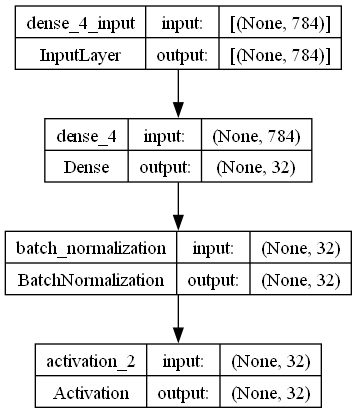

In [68]:
model = Sequential()

model.add(Dense(32, input_shape=(28 * 28, ), kernel_initializer="he_normal"))
model.add(BatchNormalization())
model.add(Activation("relu"))

model.summary()

plot_model(model, show_shapes=True)

### 규제화
- 복잡한 네트워크 일수록 네트워크의 복잡도에 제한을 두어  
  가중치가 작은 값을 가지도록 함

- 가중치의 분포가 더 균일하게 됨

- 네트워크 손실함수에 큰 가중치에 연관된 비용을 추가
  - L1 규제 : 가중치의 절댓값에 비례하는 비용이 추가
  - L2 규제 : 가중치의 제곱에 비례하는 비용이 추가(흔히 가중치 감쇠라고도 불림)
  - 위 2규제가 합쳐진 경우도 존재

데이터는 **모델의 크기** 파트에서 사용된 imdb dataset

In [69]:
from keras.regularizers import l1, l2, l1_l2

#### 모델 구성

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 16)                160016    
                                                                 
 dense_7 (Dense)             (None, 16)                272       
                                                                 
 dense_8 (Dense)             (None, 1)                 17        
                                                                 
Total params: 160305 (626.19 KB)
Trainable params: 160305 (626.19 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


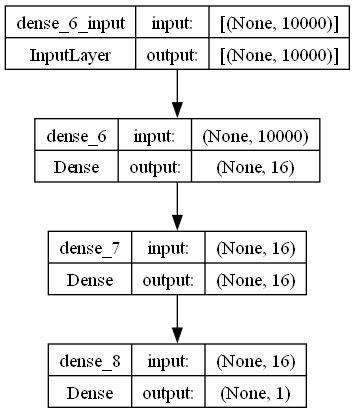

In [71]:
l2_model = Sequential([
    Dense(16, kernel_regularizer=l2(0.001), activation="relu", input_shape=(10_000, )),
    Dense(16, kernel_regularizer=l2(0.001), activation="relu"),
    Dense(1, activation="sigmoid")
])

l2_model.compile(
    loss="binary_crossentropy",
    optimizer='rmsprop',
    metrics=['acc']
)

l2_model.summary()
plot_model(l2_model, show_shapes=True)

#### 모델 학습

In [72]:
l2_model_hist = l2_model.fit(
    x_train_preprocessed, y_train_preprocessed,
    epochs=20,
    batch_size=512,
    validation_data=(x_test_preprocessed, y_test_preprocessed)
)

Epoch 1/20
49/49 [==============================] - 2s 29ms/step - loss: 0.5807 - acc: 0.7477 - val_loss: 0.4482 - val_acc: 0.8708
Epoch 2/20
49/49 [==============================] - 1s 13ms/step - loss: 0.3624 - acc: 0.8924 - val_loss: 0.3508 - val_acc: 0.8863
Epoch 3/20
49/49 [==============================] - 1s 12ms/step - loss: 0.2899 - acc: 0.9123 - val_loss: 0.3309 - val_acc: 0.8888
Epoch 4/20
49/49 [==============================] - 1s 11ms/step - loss: 0.2568 - acc: 0.9262 - val_loss: 0.3311 - val_acc: 0.8880
Epoch 5/20
49/49 [==============================] - 1s 13ms/step - loss: 0.2410 - acc: 0.9325 - val_loss: 0.3541 - val_acc: 0.8792
Epoch 6/20
49/49 [==============================] - 1s 11ms/step - loss: 0.2285 - acc: 0.9369 - val_loss: 0.3515 - val_acc: 0.8796
Epoch 7/20
49/49 [==============================] - 1s 13ms/step - loss: 0.2168 - acc: 0.9440 - val_loss: 0.3859 - val_acc: 0.8675
Epoch 8/20
49/49 [==============================] - 1s 12ms/step - loss: 0.2126 - a

#### 시각화
- Model 1은 **모델의 크기 축소**파트에서의 모델

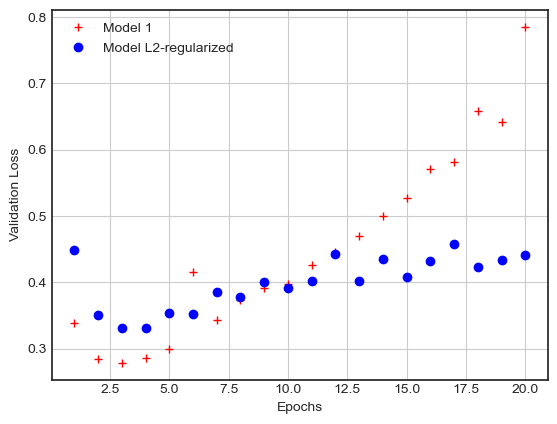

In [73]:
l2_model_val_loss = l2_model_hist.history["val_loss"]
epochs = range(1, 21)

plt.plot(epochs, val_loss_1, "r+", label="Model 1")
plt.plot(epochs, l2_model_val_loss, "bo", label="Model L2-regularized")
plt.xlabel("Epochs")
plt.ylabel("Validation Loss")
plt.legend()
plt.grid()

plt.show()

#### L1과 비교

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 16)                160016    
                                                                 
 dense_10 (Dense)            (None, 16)                272       
                                                                 
 dense_11 (Dense)            (None, 1)                 17        
                                                                 
Total params: 160305 (626.19 KB)
Trainable params: 160305 (626.19 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


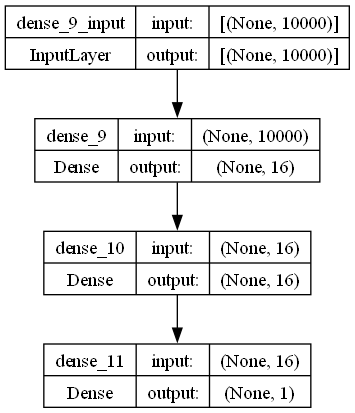

In [74]:
l1_model = Sequential([
    Dense(16, kernel_regularizer=l1(0.001), activation="relu", input_shape=(10_000, )),
    Dense(16, kernel_regularizer=l1(0.001), activation="relu"),
    Dense(1, activation="sigmoid")
])

l1_model.compile(
    loss="binary_crossentropy",
    optimizer='rmsprop',
    metrics=['acc']
)

l1_model.summary()
plot_model(l1_model, show_shapes=True)

In [75]:
l1_model_hist = l1_model.fit(
    x_train_preprocessed, y_train_preprocessed,
    epochs=20,
    batch_size=512,
    validation_data=(x_test_preprocessed, y_test_preprocessed)
)

Epoch 1/20
49/49 [==============================] - 2s 30ms/step - loss: 0.9697 - acc: 0.7678 - val_loss: 0.6820 - val_acc: 0.8100
Epoch 2/20
49/49 [==============================] - 1s 12ms/step - loss: 0.6262 - acc: 0.8506 - val_loss: 0.5955 - val_acc: 0.8606
Epoch 3/20
49/49 [==============================] - 1s 12ms/step - loss: 0.5788 - acc: 0.8587 - val_loss: 0.5674 - val_acc: 0.8608
Epoch 4/20
49/49 [==============================] - 1s 12ms/step - loss: 0.5514 - acc: 0.8671 - val_loss: 0.5558 - val_acc: 0.8593
Epoch 5/20
49/49 [==============================] - 1s 12ms/step - loss: 0.5361 - acc: 0.8677 - val_loss: 0.5366 - val_acc: 0.8656
Epoch 6/20
49/49 [==============================] - 1s 12ms/step - loss: 0.5245 - acc: 0.8697 - val_loss: 0.5237 - val_acc: 0.8684
Epoch 7/20
49/49 [==============================] - 1s 12ms/step - loss: 0.5142 - acc: 0.8741 - val_loss: 0.5155 - val_acc: 0.8706
Epoch 8/20
49/49 [==============================] - 1s 12ms/step - loss: 0.5062 - a

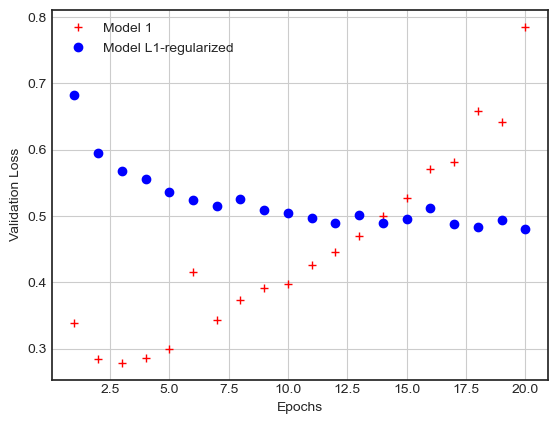

In [76]:
l1_model_val_loss = l1_model_hist.history["val_loss"]
epochs = range(1, 21)

plt.plot(epochs, val_loss_1, "r+", label="Model 1")
plt.plot(epochs, l1_model_val_loss, "bo", label="Model L1-regularized")
plt.xlabel("Epochs")
plt.ylabel("Validation Loss")
plt.legend()
plt.grid()

plt.show()

3가지 모델 비교
- Original
- L1
- L2

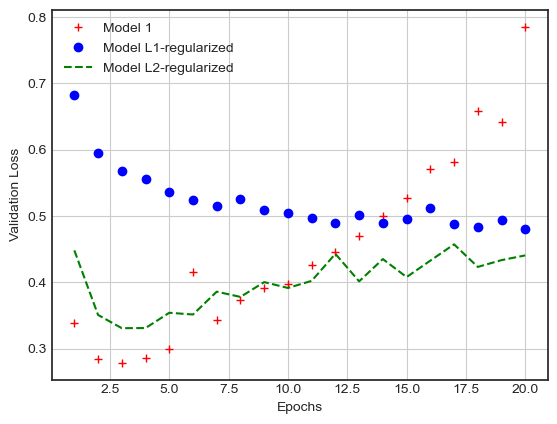

In [80]:
plt.plot(epochs, val_loss_1, 'r+', label='Model 1')
plt.plot(epochs, l1_model_val_loss, 'bo', label='Model L1-regularized')
plt.plot(epochs, l2_model_val_loss, 'g--', label='Model L2-regularized')

plt.xlabel("Epochs")
plt.ylabel("Validation Loss")
plt.legend()
plt.grid()

plt.show()

#### L1, L2와 비교

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 16)                160016    
                                                                 
 dense_25 (Dense)            (None, 16)                272       
                                                                 
 dense_26 (Dense)            (None, 1)                 17        
                                                                 
Total params: 160305 (626.19 KB)
Trainable params: 160305 (626.19 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


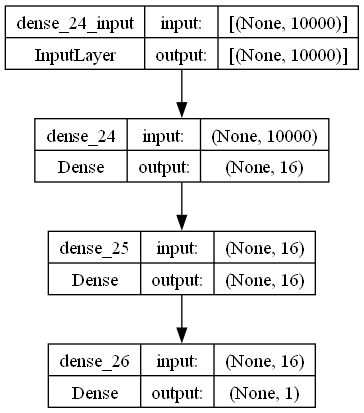

In [89]:
l1_l2_model = Sequential([
    Dense(16, kernel_regularizer=l1_l2(l1=0.001, l2=0.001), activation="relu", input_shape=(10_000, )),
    Dense(16, kernel_regularizer=l1_l2(l1=0.001, l2=0.001), activation="relu"),
    Dense(1, activation="sigmoid")
])

l1_l2_model.compile(
    loss="binary_crossentropy",
    optimizer='rmsprop',
    metrics=['acc']
)

l1_l2_model.summary()
plot_model(l1_l2_model, show_shapes=True)

In [90]:
l1_l2_model_hist = l1_l2_model.fit(
    x_train_preprocessed, y_train_preprocessed,
    epochs=20,
    batch_size=512,
    validation_data=(x_test_preprocessed, y_test_preprocessed)
)

Epoch 1/20
49/49 [==============================] - 2s 31ms/step - loss: 0.9802 - acc: 0.7726 - val_loss: 0.6817 - val_acc: 0.8343
Epoch 2/20
49/49 [==============================] - 1s 12ms/step - loss: 0.6457 - acc: 0.8405 - val_loss: 0.6280 - val_acc: 0.8420
Epoch 3/20
49/49 [==============================] - 1s 12ms/step - loss: 0.6008 - acc: 0.8512 - val_loss: 0.5909 - val_acc: 0.8537
Epoch 4/20
49/49 [==============================] - 1s 11ms/step - loss: 0.5788 - acc: 0.8561 - val_loss: 0.5665 - val_acc: 0.8577
Epoch 5/20
49/49 [==============================] - 1s 11ms/step - loss: 0.5618 - acc: 0.8593 - val_loss: 0.5747 - val_acc: 0.8498
Epoch 6/20
49/49 [==============================] - 1s 12ms/step - loss: 0.5539 - acc: 0.8599 - val_loss: 0.5494 - val_acc: 0.8620
Epoch 7/20
49/49 [==============================] - 1s 11ms/step - loss: 0.5478 - acc: 0.8626 - val_loss: 0.5481 - val_acc: 0.8631
Epoch 8/20
49/49 [==============================] - 1s 11ms/step - loss: 0.5381 - a

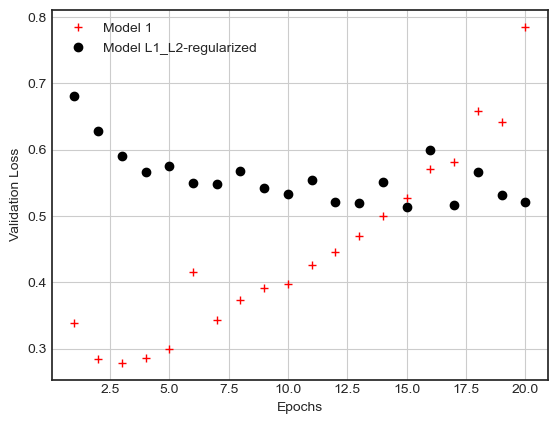

In [91]:
l1_l2_model_val_loss = l1_l2_model_hist.history["val_loss"]

plt.plot(epochs, val_loss_1, 'r+', label='Model 1')
plt.plot(epochs, l1_l2_model_val_loss, 'ko', label='Model L1_L2-regularized')

plt.xlabel("Epochs")
plt.ylabel("Validation Loss")
plt.legend()
plt.grid()

plt.show()

4가지 모델 비교
- Original

- L1

- L2

- L1_L2

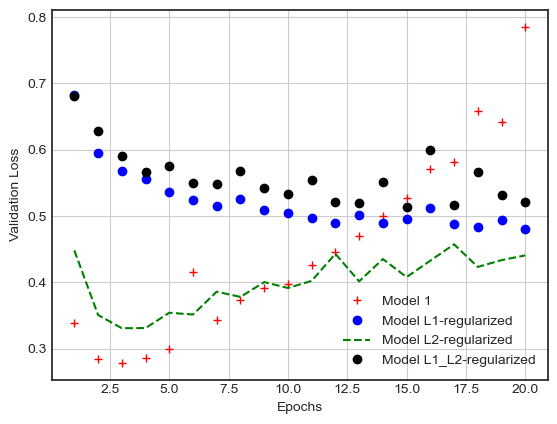

In [92]:
plt.plot(epochs, val_loss_1, 'r+', label='Model 1')
plt.plot(epochs, l1_model_val_loss, 'bo', label='Model L1-regularized')
plt.plot(epochs, l2_model_val_loss, 'g--', label='Model L2-regularized')
plt.plot(epochs, l1_l2_model_val_loss, 'ko', label='Model L1_L2-regularized')

plt.xlabel("Epochs")
plt.ylabel("Validation Loss")
plt.legend()
plt.grid()

plt.show()

### 드롭아웃(Dropout)
- 신경망을 위해 사용되는 규제 기법 중 가장 효과적이고 널리 사용되는 방법

- 신경망의 레이어에 드롭아웃을 적용하면 훈련하는 동안 무작위로 층의 일부 특성(노드)를 제외
  - 예를 들어, [1.0, 3.2, 0.6, 0.8, 1.1] 라는 벡터에 대해 드롭아웃을 적용하면 **무작위로 0으로 바뀜**  
    $\rightarrow$ [0, 3.2, 0.6, 0.8, 0]

  - 보통 0.2 ~ 0.5 사이의 비율로 지정됨

- 테스트 단계에서는 그 어떤 노드도 드롭아웃 되지 않는다.
  - 대신 해당 레이어의 출력 노드를 드롭아웃 비율에 맞게 줄여줌

In [85]:
from keras.layers import Dropout

#### 모델 구성

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 16)                160016    
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_22 (Dense)            (None, 16)                272       
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense_23 (Dense)            (None, 1)                 17        
                                                                 
Total params: 160305 (626.19 KB)
Trainable params: 160305 (626.19 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


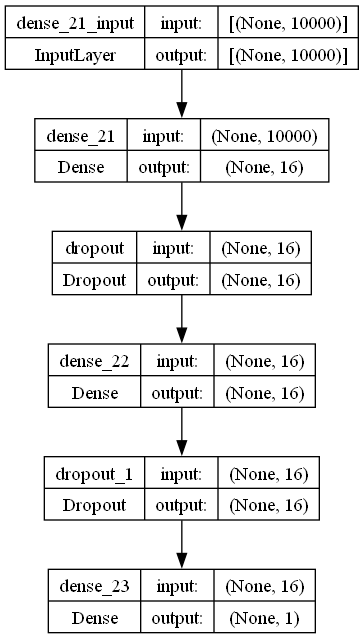

In [86]:
dropout_model = Sequential([
    Dense(16, activation="relu", input_shape=(10_000, )),
    Dropout(0.5),
    Dense(16, activation="relu"),
    Dropout(0.5),
    Dense(1, activation="sigmoid")
])

dropout_model.compile(
    loss="binary_crossentropy",
    optimizer='rmsprop',
    metrics=['acc']
)

dropout_model.summary()
plot_model(dropout_model, show_shapes=True)

#### 모델 학습

In [87]:
dropout_model_hist = dropout_model.fit(
    x_train_preprocessed, y_train_preprocessed,
    epochs=20,
    batch_size=512,
    validation_data=(x_test_preprocessed, y_test_preprocessed)
)

Epoch 1/20
49/49 [==============================] - 2s 30ms/step - loss: 0.6141 - acc: 0.6596 - val_loss: 0.4843 - val_acc: 0.8535
Epoch 2/20
49/49 [==============================] - 1s 12ms/step - loss: 0.4743 - acc: 0.7864 - val_loss: 0.3567 - val_acc: 0.8768
Epoch 3/20
49/49 [==============================] - 1s 12ms/step - loss: 0.3789 - acc: 0.8480 - val_loss: 0.3053 - val_acc: 0.8854
Epoch 4/20
49/49 [==============================] - 1s 12ms/step - loss: 0.3226 - acc: 0.8807 - val_loss: 0.2794 - val_acc: 0.8884
Epoch 5/20
49/49 [==============================] - 1s 12ms/step - loss: 0.2854 - acc: 0.8971 - val_loss: 0.2761 - val_acc: 0.8888
Epoch 6/20
49/49 [==============================] - 1s 12ms/step - loss: 0.2524 - acc: 0.9122 - val_loss: 0.2847 - val_acc: 0.8878
Epoch 7/20
49/49 [==============================] - 1s 12ms/step - loss: 0.2282 - acc: 0.9248 - val_loss: 0.2939 - val_acc: 0.8874
Epoch 8/20
49/49 [==============================] - 1s 12ms/step - loss: 0.2065 - a

#### 시각화

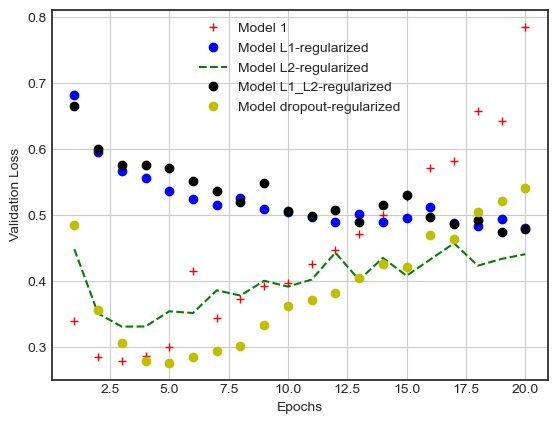

In [88]:
dropout_model_val_loss = dropout_model_hist.history["val_loss"]

plt.plot(epochs, val_loss_1, 'r+', label='Model 1')
plt.plot(epochs, l1_model_val_loss, 'bo', label='Model L1-regularized')
plt.plot(epochs, l2_model_val_loss, 'g--', label='Model L2-regularized')
plt.plot(epochs, l1_l2_model_val_loss, 'ko', label='Model L1_L2-regularized')
plt.plot(epochs, dropout_model_val_loss, 'yo', label='Model dropout-regularized')

plt.xlabel("Epochs")
plt.ylabel("Validation Loss")
plt.legend()
plt.grid()

plt.show()

## 전체

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_33 (Dense)            (None, 16)                160016    
                                                                 
 dropout_6 (Dropout)         (None, 16)                0         
                                                                 
 dense_34 (Dense)            (None, 16)                272       
                                                                 
 dropout_7 (Dropout)         (None, 16)                0         
                                                                 
 dense_35 (Dense)            (None, 1)                 17        
                                                                 
Total params: 160305 (626.19 KB)
Trainable params: 160305 (626.19 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


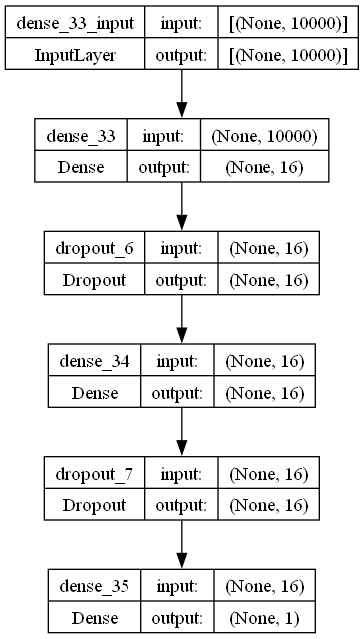

In [99]:
model = Sequential([
    Dense(16, kernel_regularizer=l1_l2(l1=0.001, l2=0.001), activation="relu", input_shape=(10_000, )),
    Dropout(0.5),
    Dense(16, kernel_regularizer=l1_l2(l1=0.001, l2=0.001), activation="relu"),
    Dropout(0.5),
    Dense(1, activation="sigmoid")
])

model.compile(
    loss="binary_crossentropy",
    optimizer='rmsprop',
    metrics=['acc']
)

model.summary()
plot_model(model, show_shapes=True)

#### 모델 학습

In [100]:
model_hist = model.fit(
    x_train_preprocessed, y_train_preprocessed,
    epochs=20,
    batch_size=512,
    validation_data=(x_test_preprocessed, y_test_preprocessed)
)

Epoch 1/20
49/49 [==============================] - 2s 30ms/step - loss: 1.0626 - acc: 0.6437 - val_loss: 0.7747 - val_acc: 0.7936
Epoch 2/20
49/49 [==============================] - 1s 12ms/step - loss: 0.7702 - acc: 0.7466 - val_loss: 0.7115 - val_acc: 0.8387
Epoch 3/20
49/49 [==============================] - 1s 12ms/step - loss: 0.7182 - acc: 0.7835 - val_loss: 0.6617 - val_acc: 0.8496
Epoch 4/20
49/49 [==============================] - 1s 12ms/step - loss: 0.6826 - acc: 0.8016 - val_loss: 0.6169 - val_acc: 0.8537
Epoch 5/20
49/49 [==============================] - 1s 12ms/step - loss: 0.6625 - acc: 0.8108 - val_loss: 0.5854 - val_acc: 0.8562
Epoch 6/20
49/49 [==============================] - 1s 12ms/step - loss: 0.6419 - acc: 0.8220 - val_loss: 0.5740 - val_acc: 0.8549
Epoch 7/20
49/49 [==============================] - 1s 12ms/step - loss: 0.6347 - acc: 0.8253 - val_loss: 0.5619 - val_acc: 0.8619
Epoch 8/20
49/49 [==============================] - 1s 12ms/step - loss: 0.6275 - a

#### 시각화

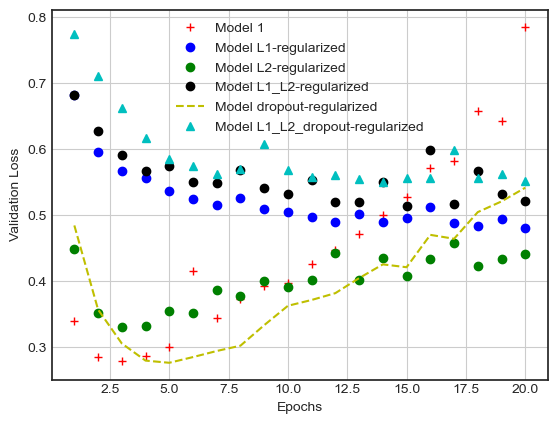

In [101]:
model_val_loss = model_hist.history["val_loss"]

plt.plot(epochs, val_loss_1, 'r+', label='Model 1')
plt.plot(epochs, l1_model_val_loss, 'bo', label='Model L1-regularized')
plt.plot(epochs, l2_model_val_loss, 'go', label='Model L2-regularized')
plt.plot(epochs, l1_l2_model_val_loss, 'ko', label='Model L1_L2-regularized')
plt.plot(epochs, dropout_model_val_loss, 'y--', label='Model dropout-regularized')
plt.plot(epochs, model_val_loss, 'c^', label='Model L1_L2_dropout-regularized')

plt.xlabel("Epochs")
plt.ylabel("Validation Loss")
plt.legend()
plt.grid()

plt.show()